## Sauce Labs Coding Challenge


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('free_trial.csv')
df.head()

,username,trial_start_time,trial_end_time,is_banned,is_upgrade,upgrade_time,monthly_price,subscription_months,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes
0,2,10/12/17 15:48,10/26/17 15:48,False,False,NaN,NaN,NaN,0.270446,4,677,5,672,148.316667
1,3,3/8/18 04:07,3/8/18 04:08,True,False,NaN,NaN,NaN,0.956969,1,1,1,0,1.066667
2,4,2/26/17 12:52,3/12/17 12:52,False,False,NaN,NaN,NaN,0.250976,1,1,1,0,11.466667
3,5,4/25/18 22:04,5/9/18 22:04,False,False,NaN,NaN,NaN,0.791360,1,5,5,0,48.983333
4,6,3/16/18 20:20,3/30/18 20:20,False,False,NaN,NaN,NaN,0.519702,1,6,6,0,83.383333


In [4]:
from datetime import datetime

df['trial_start_time'] = pd.to_datetime(df['trial_start_time'])
df['trial_end_time'] = pd.to_datetime(df['trial_end_time'])

df['days'] = df['trial_end_time'] - df['trial_start_time']
df['days'] = df['days'].apply(lambda x: x.days)
#maybe the duration of the trail has some impact

df['year_ago'] = df['trial_start_time'].apply(lambda x: 2020 - x.year)
#maybe the demand is going up with time

In [5]:
df.describe()

,username,monthly_price,subscription_months,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes,days,year_ago
count,30666.000000,281.000000,281.000000,30532.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000
mean,15334.500000,96.199288,6.395018,0.665844,1.349410,13.445151,8.235896,5.209255,81.723549,12.477141,2.421607
std,8852.656014,153.145692,7.410695,0.217382,1.248055,104.447522,74.244412,73.944781,814.142386,4.314456,0.619327
min,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7668.250000,19.000000,1.000000,0.522403,1.000000,1.000000,1.000000,0.000000,6.004167,14.000000,2.000000
50%,15334.500000,29.000000,3.000000,0.728916,1.000000,2.000000,2.000000,0.000000,17.716667,14.000000,2.000000
75%,23000.750000,149.000000,11.000000,0.813750,1.000000,6.000000,5.000000,0.000000,48.650000,14.000000,3.000000
max,30667.000000,1599.000000,29.000000,1.000000,15.000000,7320.000000,7320.000000,5695.000000,76092.383330,29.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30666 entries, 0 to 30665
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   username             30666 non-null  int64         
 1   trial_start_time     30666 non-null  datetime64[ns]
 2   trial_end_time       30666 non-null  datetime64[ns]
 3   is_banned            30666 non-null  bool          
 4   is_upgrade           30666 non-null  bool          
 5   upgrade_time         281 non-null    object        
 6   monthly_price        281 non-null    float64       
 7   subscription_months  281 non-null    float64       
 8   spam_score           30532 non-null  float64       
 9   trial_used_days      30666 non-null  int64         
 10  job_count            30666 non-null  int64         
 11  manual_jobs          30666 non-null  int64         
 12  auto_jobs            30666 non-null  int64         
 13  minutes              30666 non-

In [7]:
df.describe()

,username,monthly_price,subscription_months,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes,days,year_ago
count,30666.000000,281.000000,281.000000,30532.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000,30666.000000
mean,15334.500000,96.199288,6.395018,0.665844,1.349410,13.445151,8.235896,5.209255,81.723549,12.477141,2.421607
std,8852.656014,153.145692,7.410695,0.217382,1.248055,104.447522,74.244412,73.944781,814.142386,4.314456,0.619327
min,2.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7668.250000,19.000000,1.000000,0.522403,1.000000,1.000000,1.000000,0.000000,6.004167,14.000000,2.000000
50%,15334.500000,29.000000,3.000000,0.728916,1.000000,2.000000,2.000000,0.000000,17.716667,14.000000,2.000000
75%,23000.750000,149.000000,11.000000,0.813750,1.000000,6.000000,5.000000,0.000000,48.650000,14.000000,3.000000
max,30667.000000,1599.000000,29.000000,1.000000,15.000000,7320.000000,7320.000000,5695.000000,76092.383330,29.000000,3.000000


We should look into why spam score is nan for some rows.

In [8]:
df_spam_score_is_nan = df[df['spam_score'].isnull()]

In [9]:
df = df[df['spam_score'].notna()]

In [11]:
upgared_info = df.iloc[:,5:8]
X = df.iloc[:, [3,8,9,10,11,12,13,14,15]]
y = df.iloc[:,4:5]

X["is_banned"] = df["is_banned"].astype(int)
y['is_upgrade'] = df["is_upgrade"].astype(int)

newdf = X.copy()
newdf['is_upgrade'] = y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
newdf

,is_banned,spam_score,trial_used_days,job_count,manual_jobs,auto_jobs,minutes,days,year_ago,is_upgrade
0,0,0.270446,4,677,5,672,148.316667,14,3,0
1,1,0.956969,1,1,1,0,1.066667,0,2,0
2,0,0.250976,1,1,1,0,11.466667,14,3,0
3,0,0.791360,1,5,5,0,48.983333,14,2,0
4,0,0.519702,1,6,6,0,83.383333,14,2,0
...,...,...,...,...,...,...,...,...,...,...
30661,0,0.253930,2,30,0,30,17.116667,0,3,1
30662,0,0.549506,2,86,83,3,6.000000,14,2,1
30663,0,0.640820,1,70,70,0,86.466667,5,3,1
30664,0,0.453295,2,59,59,0,16.600000,14,3,1


Let's go some general visualization, to get an idea of the data.

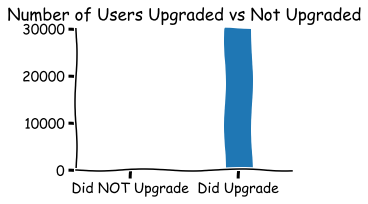

In [13]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0, 0, 0.5, 0.5))
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Did NOT Upgrade', 'Did Upgrade'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks(list(range(0, len(y), 10000)))
    ax.set_ylim([0, len(y)])
    
    ax.bar([0, 1], [0, int(y.isin([0]).sum())], 0.25)
    ax.bar([0, 0.01], [0, int(y.isin([1]).sum())], 0.25)

    ax.set_title("Number of Users Upgraded vs Not Upgraded")

plt.show()

In [14]:
p_upgraded = int(y.isin([1]).sum()) / len(y) *100
print("Percentage of People that Upgraded: {:0.2f} %".format(p_upgraded))

p_no_upgraded = int(y.isin([0]).sum()) / len(y) *100
print("Percentage of People that DID NOT Upgraded: {:0.2f} %".format(p_no_upgraded))

Percentage of People that Upgraded: 0.91 %
Percentage of People that DID NOT Upgraded: 99.09 %


We should check for outliers.

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = classifier.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

sens = cm[0][0] / (cm[0][0]+cm[0][1]) *100
spec = cm[1][1] / (cm[1][1]+cm[1][0]) *100

print("The sensitivity for this model is: {:0.2f} %".format(sens))
print("The specificity for this model is: {:0.2f} %".format(spec))


The sensitivity for this model is: 99.92 %
The specificity for this model is: 52.69 %


Already a pretty good answer. But we should look into the specificity

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Varianble selection using LASSO.

In [19]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
reg = LassoCV(cv=10)
reg.fit(X_scaled, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.000010
Best score using built-in LassoCV: -1058276.510690


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03414239932155283, tolerance: 0.027645051093934208
  positive)


In [20]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

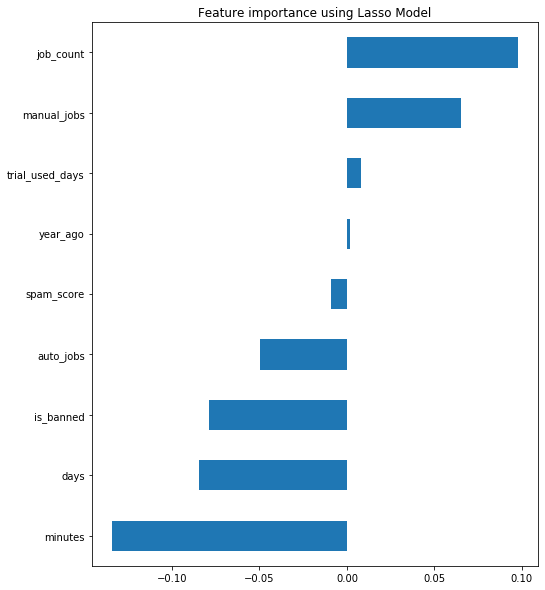

In [21]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [32]:
import statsmodels.formula.api as smf
results = smf.logit(formula="is_upgrade ~ job_count + days ", data=newdf).fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.049931
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_upgrade   No. Observations:                30532
Model:                          Logit   Df Residuals:                    30529
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 0.03982
Time:                        20:48:32   Log-Likelihood:                -1524.5
converged:                       True   LL-Null:                       -1587.7
Covariance Type:            nonrobust   LLR p-value:                 3.500e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5827      0.108    -33.276      0.000      -3.794      -3.372
job_count      0.0010      0.000      5.465      0.000       0.001       0.001
days          -0.1014      0.009    -10.853      0.000      -0.120      -0.083
==============================================================================
"""

In [38]:
newX = newdf[['job_count', 'manual_jobs','auto_jobs','days']]

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(newX, y)

y_pred = classifier.predict(newX)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

sens = cm[0][0] / (cm[0][0]+cm[0][1]) *100
spec = cm[1][1] / (cm[1][1]+cm[1][0]) *100

print("The sensitivity for this model is: {:0.2f} %".format(sens))
print("The specificity for this model is: {:0.2f} %".format(spec))

The sensitivity for this model is: 99.99 %
The specificity for this model is: 0.00 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA with LASSO

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_PCA = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.18481752e-01, 2.36238876e-01, 1.41065940e-01, 1.11230947e-01,
       9.81722180e-02, 8.65662878e-02, 5.99251498e-03, 2.25146343e-03,
       2.30313164e-33])

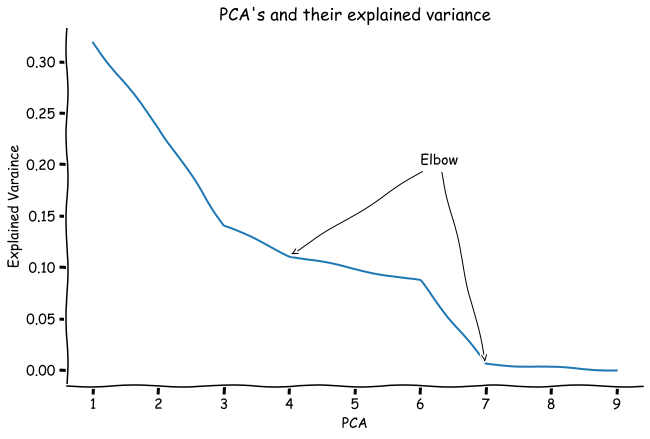

In [42]:
#A fun way to plot using the xkcd format :)

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1, 0.5))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks(list(range(1,len(explained_variance)+1)))

    ax.annotate(
        'Elbow',
        xy=(4,explained_variance[3]), arrowprops=dict(arrowstyle='->'), xytext=(6, 0.2))
    
    ax.annotate(
        'Elbow',
        xy=(7,explained_variance[6]), arrowprops=dict(arrowstyle='->'), xytext=(6, 0.2))

    ax.plot(list(range(1,len(explained_variance)+1)), explained_variance)

    ax.set_title("PCA's and their explained variance")
    ax.set_xlabel('PCA')
    ax.set_ylabel('Explained Varaince')


We can try to take the first 4 or 7 PCA's to use